#Data Ingestion

In [ ]:
#Author: Ashish KC 
#Date: March 9th, 2020 

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib inline

#Here are going to be using PyDrive to access the .xlsx or .json file. 

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# plt.style.use('dark_background')
# plt.style.use('seaborn-whitegrid')
# plt.style.use('default')
# plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-dark-palette')

In [ ]:
#This link is from when you "right-click" on the google drive file of interest and you say "get shareable link", make sure to paste it here. 

link1 = 'https://drive.google.com/open?id=1YuEVPC795Xdpnsfykde6bz6QfwO_e937'
link2 = 'https://drive.google.com/open?id=1o9NdKVoxLFvyyTTPG0Cma-23fawHlCOD'
link3 = 'https://drive.google.com/open?id=1cuY_KAw-2jBzVSAnCg3p5LcbyAyioY99'
link4 = 'https://drive.google.com/open?id=1Of3o6_SY33a5LK36cysq7tp0QCURh_ri'
link5 = 'https://drive.google.com/open?id=1k3I8-LhPm4QEPscYUZQdc0dA-kS9Jxwl'
link6 = 'https://drive.google.com/open?id=1QzuxjWZjZFaAou_zzT8TOqhZY54nleR_'

#Change the following link to whatever your the file link is. 

fluff, id1 = link1.split('=')
fluff, id2 = link2.split('=')
fluff, id3 = link3.split('=')
fluff, id4 = link4.split('=')
fluff, id5 = link5.split('=')
fluff, id6 = link6.split('=')

In [ ]:
# Original hauls
# downloaded1 = drive.CreateFile({'id':id1})
# downloaded1.GetContentFile('Haul_1_Ore_C.xlsx') 

# downloaded2 = drive.CreateFile({'id':id2})
# downloaded2.GetContentFile('Haul_1_Ore_D.xlsx') 

# downloaded3 = drive.CreateFile({'id':id3})
# downloaded3.GetContentFile('Haul_1_Wst_C.xlsx') 

# downloaded4 = drive.CreateFile({'id':id4})
# downloaded4.GetContentFile('Haul_1_Wst_D.xlsx') 

# downloaded5 = drive.CreateFile({'id':id5})
# downloaded5.GetContentFile('Haul_2_Wst_C.xlsx') 

# downloaded6 = drive.CreateFile({'id':id6})
# downloaded6.GetContentFile('Haul_2_Wst_D.xlsx') 


# haul_1_C = pd.read_excel('Haul_1_Ore_C.xlsx')
# haul_1_D = pd.read_excel('Haul_1_Ore_D.xlsx')
# haul_2_C = pd.read_excel('Haul_1_Wst_C.xlsx')
# haul_2_D = pd.read_excel('Haul_1_Wst_D.xlsx')
# haul_3_C = pd.read_excel('Haul_2_Wst_C.xlsx')
# haul_3_D = pd.read_excel('Haul_2_Wst_D.xlsx')

In [ ]:
downloaded1 = drive.CreateFile({'id':id1})
downloaded1.GetContentFile('Haul_5_C.xlsx') 

downloaded2 = drive.CreateFile({'id':id2})
downloaded2.GetContentFile('Haul_5_D.xlsx') 

downloaded3 = drive.CreateFile({'id':id3})
downloaded3.GetContentFile('Haul_1_Wst_C.xlsx') 

downloaded4 = drive.CreateFile({'id':id4})
downloaded4.GetContentFile('Haul_1_Wst_D.xlsx') 

downloaded5 = drive.CreateFile({'id':id5})
downloaded5.GetContentFile('Haul_6_C.xlsx') 

downloaded6 = drive.CreateFile({'id':id6})
downloaded6.GetContentFile('Haul_6_D.xlsx') 


haul_1_C = pd.read_excel('Haul_5_C.xlsx')
haul_1_D = pd.read_excel('Haul_5_D.xlsx')
haul_2_C = pd.read_excel('Haul_1_Wst_C.xlsx')
haul_2_D = pd.read_excel('Haul_1_Wst_D.xlsx')
haul_3_C = pd.read_excel('Haul_6_C.xlsx')
haul_3_D = pd.read_excel('Haul_6_D.xlsx')

In [ ]:
haul_3_C.head()

,Unnamed: 0,TIMESTAMP,EQUIP_IDENT,SHIFT_IDENT,FUEL_USED_IN_CYCLE,HAUL_CYCLE_REC_IDENT,FUEL_CAPACITY,EQMODEL_CODE,START_TIME,END_TIME,SHIFT_DATE,TONNES,TOTAL_TIME,EFH_DIST,LOAD_LOCATION,DUMP_LOCATION,MATERIAL_IDENT,FC_Index,FE_Index,Week_Number,Normalized_FC,L_OpHr
0,164,2019-09-01 07:43:12,6180,2,22.500000,5920365,4462,CAT793C,2019-09-01 08:13:49,2019-09-01 08:41:50,2019-09-01,230,0.418333,10.729,V1070h,24 Mile 1,WRk,0.009118,0.003814,35,-1.787690,53.784861
1,166,2019-09-01 08:12:23,6180,2,27.000000,5920378,4462,CAT793C,2019-09-01 08:41:50,2019-09-01 09:12:31,2019-09-01,230,0.511388,10.728,V1070h,24 Mile 1,WRk,0.010943,0.005596,35,0.053187,52.797450
2,169,2019-09-01 08:18:34,6169,2,24.683857,5920377,4462,CAT793C,2019-09-01 08:42:59,2019-09-01 09:18:43,2019-09-01,230,0.557223,10.725,V1070h,24 Mile 1,WRk,0.010007,0.005576,35,-0.891045,44.297960
3,170,2019-09-01 08:29:22,6177,2,22.750000,5920396,4462,CAT793C,2019-09-01 09:03:07,2019-09-01 09:29:31,2019-09-01,230,0.440002,10.720,V1070h,24 Mile 1,WRk,0.009227,0.004060,35,-1.677667,51.704350
4,174,2019-09-01 09:15:15,6177,2,27.250000,5920416,4462,CAT793C,2019-09-01 09:29:31,2019-09-01 10:15:25,2019-09-01,230,0.566945,10.674,V1070h,24 Mile 1,WRk,0.011100,0.006293,35,0.211780,48.064627


In [ ]:
print(haul_1_C.shape, haul_1_D.shape, haul_2_C.shape, haul_2_D.shape, haul_3_C.shape, haul_3_D.shape)

(572, 18) (1402, 18) (1227, 18) (1629, 18) (597, 18) (1125, 18)


In [ ]:
haul_1_C['FE_Index'] = ((haul_1_C['FUEL_USED_IN_CYCLE'] * haul_1_C['TOTAL_TIME'])) / ((haul_1_C['TONNES'] * haul_1_C['EFH_DIST']))
haul_2_C['FE_Index'] = ((haul_2_C['FUEL_USED_IN_CYCLE'] * haul_2_C['TOTAL_TIME'])) / ((haul_2_C['TONNES'] * haul_2_C['EFH_DIST']))
haul_3_C['FE_Index'] = ((haul_3_C['FUEL_USED_IN_CYCLE'] * haul_3_C['TOTAL_TIME'])) / ((haul_3_C['TONNES'] * haul_3_C['EFH_DIST']))

In [ ]:
haul_1_D['FE_Index'] = ((haul_1_D['FUEL_USED_IN_CYCLE'] * haul_1_D['TOTAL_TIME'])) / ((haul_1_D['TONNES'] * haul_1_D['EFH_DIST']))
haul_2_D['FE_Index'] = ((haul_2_D['FUEL_USED_IN_CYCLE'] * haul_2_D['TOTAL_TIME'])) / ((haul_2_D['TONNES'] * haul_2_D['EFH_DIST']))
haul_3_D['FE_Index'] = ((haul_3_D['FUEL_USED_IN_CYCLE'] * haul_3_D['TOTAL_TIME'])) / ((haul_3_D['TONNES'] * haul_3_D['EFH_DIST']))

In [ ]:
haul_1_C['FC_Index'] = (haul_1_C['FUEL_USED_IN_CYCLE']) / (haul_1_C['TONNES'] * haul_1_C['EFH_DIST'])
haul_2_C['FC_Index'] = (haul_2_C['FUEL_USED_IN_CYCLE']) / (haul_2_C['TONNES'] * haul_2_C['EFH_DIST'])
haul_3_C['FC_Index'] = (haul_3_C['FUEL_USED_IN_CYCLE']) / (haul_3_C['TONNES'] * haul_3_C['EFH_DIST'])

In [ ]:
haul_1_D['FC_Index'] = (haul_1_D['FUEL_USED_IN_CYCLE']) / (haul_1_D['TONNES'] * haul_1_D['EFH_DIST'])
haul_2_D['FC_Index'] = (haul_2_D['FUEL_USED_IN_CYCLE']) / (haul_2_D['TONNES'] * haul_2_D['EFH_DIST'])
haul_3_D['FC_Index'] = (haul_3_D['FUEL_USED_IN_CYCLE']) / (haul_3_D['TONNES'] * haul_3_D['EFH_DIST'])

##Week Number

In [ ]:
#Split hauls into weeks  

haul_1_C['Week_Number'] = haul_1_C['START_TIME'].dt.week
haul_2_C['Week_Number'] = haul_2_C['START_TIME'].dt.week
haul_3_C['Week_Number'] = haul_3_C['START_TIME'].dt.week

haul_1_D['Week_Number'] = haul_1_D['START_TIME'].dt.week
haul_2_D['Week_Number'] = haul_2_D['START_TIME'].dt.week
haul_3_D['Week_Number'] = haul_3_D['START_TIME'].dt.week

In [ ]:
#Splits dataframe into multiple weeks 

def create_haul_week_dfs(haul): 

  haul_week = {}
  Week_Series = haul.Week_Number.unique()
  Elements = len(Week_Series) 

  for x in range(-1,Elements): 
    haul_week[x] = haul[haul['Week_Number'] == Week_Series[x]]

  return haul_week[0], haul_week[1], haul_week[2], haul_week[3]

In [ ]:
haul_1_C_wk1, haul_1_C_wk2, haul_1_C_wk3, haul_1_C_wk4 = create_haul_week_dfs(haul_1_C)
haul_2_C_wk1, haul_2_C_wk2, haul_2_C_wk3, haul_2_C_wk4 = create_haul_week_dfs(haul_2_C)
haul_3_C_wk1, haul_3_C_wk2, haul_3_C_wk3, haul_3_C_wk4 = create_haul_week_dfs(haul_3_C)

haul_1_D_wk1, haul_1_D_wk2, haul_1_D_wk3, haul_1_D_wk4 = create_haul_week_dfs(haul_1_D)
haul_2_D_wk1, haul_2_D_wk2, haul_2_D_wk3, haul_2_D_wk4 = create_haul_week_dfs(haul_2_D)
haul_3_D_wk1, haul_3_D_wk2, haul_3_D_wk3, haul_3_D_wk4 = create_haul_week_dfs(haul_3_D)

#Statistical Analysis

In [ ]:
#Calculate CDF through determining the relative frequency and sorting the FC_Index values 

def calculate_cdf(df_series): 

  FC_Ind_Haul_Mtrl_Sorted = np.sort(df_series)
  FC_Ind_Haul_Mtrl_RF = 1. * np.arange(len(FC_Ind_Haul_Mtrl_Sorted))/len(FC_Ind_Haul_Mtrl_Sorted)  

  return FC_Ind_Haul_Mtrl_Sorted, FC_Ind_Haul_Mtrl_RF

In [ ]:
#Plots CDF relative frequency and FC_sorted values  

def plot_cdf(FC_Sorted,FC_RF,haul_FC,x): 

  plt.figure(figsize=(10,8))

  sns.lineplot(FC_Sorted, FC_RF, color = np.random.rand(3,)).set_title('Cumulative Distribution Function - Haul #'+x)
  plt.axvline(haul_FC.mean(), color = 'w', linestyle = 'dashed', linewidth = 1)

  return plt.show()

In [ ]:
#Calculates percent greater than the mean for FC_Sorted values 

def percent_greater_than_mean(FC_Sorted,haul_series):

  FC_Sorted_Greater = np.count_nonzero(FC_Sorted > haul_series.mean())
  FC_Sorted_Count = np.count_nonzero(FC_Sorted)
  Percent_Greater = np.around(np.divide(FC_Sorted_Greater, FC_Sorted_Count)*100,3) 

  return Percent_Greater

In [ ]:
FC_Index_1_C_Sorted, FC_Index_1_C_RF = calculate_cdf(haul_1_C['FC_Index'])
haul_1_C_percent_greater = percent_greater_than_mean(FC_Index_1_C_Sorted, haul_1_C['FC_Index'])

FC_Index_2_C_Sorted, FC_Index_2_C_RF = calculate_cdf(haul_2_C['FC_Index'])
haul_2_C_percent_greater = percent_greater_than_mean(FC_Index_2_C_Sorted, haul_2_C['FC_Index'])

FC_Index_3_C_Sorted, FC_Index_3_C_RF = calculate_cdf(haul_3_C['FC_Index'])
haul_3_C_percent_greater = percent_greater_than_mean(FC_Index_3_C_Sorted, haul_3_C['FC_Index'])

print(haul_1_C_percent_greater, haul_2_C_percent_greater, haul_3_C_percent_greater)

45.979 47.27 45.394


In [ ]:
FC_Index_1_D_Sorted, FC_Index_1_D_RF = calculate_cdf(haul_1_D['FC_Index'])
haul_1_D_percent_greater = percent_greater_than_mean(FC_Index_1_D_Sorted, haul_1_D['FC_Index'])

FC_Index_2_D_Sorted, FC_Index_2_D_RF = calculate_cdf(haul_2_D['FC_Index'])
haul_2_D_percent_greater = percent_greater_than_mean(FC_Index_2_D_Sorted, haul_2_D['FC_Index'])

FC_Index_3_D_Sorted, FC_Index_3_D_RF = calculate_cdf(haul_3_D['FC_Index'])
haul_3_D_percent_greater = percent_greater_than_mean(FC_Index_3_D_Sorted, haul_3_D['FC_Index'])

print(haul_1_D_percent_greater, haul_2_D_percent_greater, haul_3_D_percent_greater)

46.22 46.593 45.778


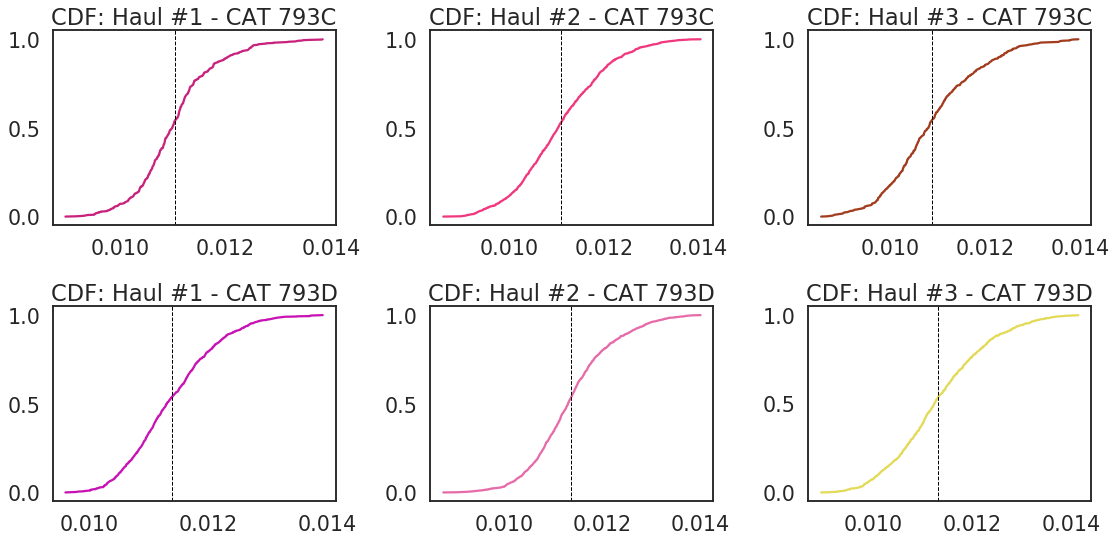

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(16,8))

ax[0,0].plot(FC_Index_1_C_Sorted, FC_Index_1_C_RF, color = np.random.rand(3,))
ax[0,0].axvline(haul_1_C.FC_Index.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
ax[0,0].set_title('CDF: Haul #1 - CAT 793C')

ax[0,1].plot(FC_Index_2_C_Sorted, FC_Index_2_C_RF, color = np.random.rand(3,))
ax[0,1].axvline(haul_2_C.FC_Index.mean(), color = 'k', linestyle ='dashed', linewidth = 1)
ax[0,1].set_title('CDF: Haul #2 - CAT 793C')

ax[0,2].plot(FC_Index_3_C_Sorted, FC_Index_3_C_RF, color = np.random.rand(3,))
ax[0,2].axvline(haul_3_C.FC_Index.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
ax[0,2].set_title('CDF: Haul #3 - CAT 793C')

ax[1,0].plot(FC_Index_1_D_Sorted, FC_Index_1_D_RF, color = np.random.rand(3,))
ax[1,0].axvline(haul_1_D.FC_Index.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
ax[1,0].set_title('CDF: Haul #1 - CAT 793D')

ax[1,1].plot(FC_Index_2_D_Sorted, FC_Index_2_D_RF, color = np.random.rand(3,))
ax[1,1].axvline(haul_2_D.FC_Index.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
ax[1,1].set_title('CDF: Haul #2 - CAT 793D')

ax[1,2].plot(FC_Index_3_D_Sorted, FC_Index_3_D_RF, color = np.random.rand(3,))
ax[1,2].axvline(haul_3_D.FC_Index.mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
ax[1,2].set_title('CDF: Haul #3 - CAT 793D')
# ax[1,2].set_xticks([0.000275,0.0003,0.000325, 0.00035,0.000375,0.0004, 0.000425])


fig.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


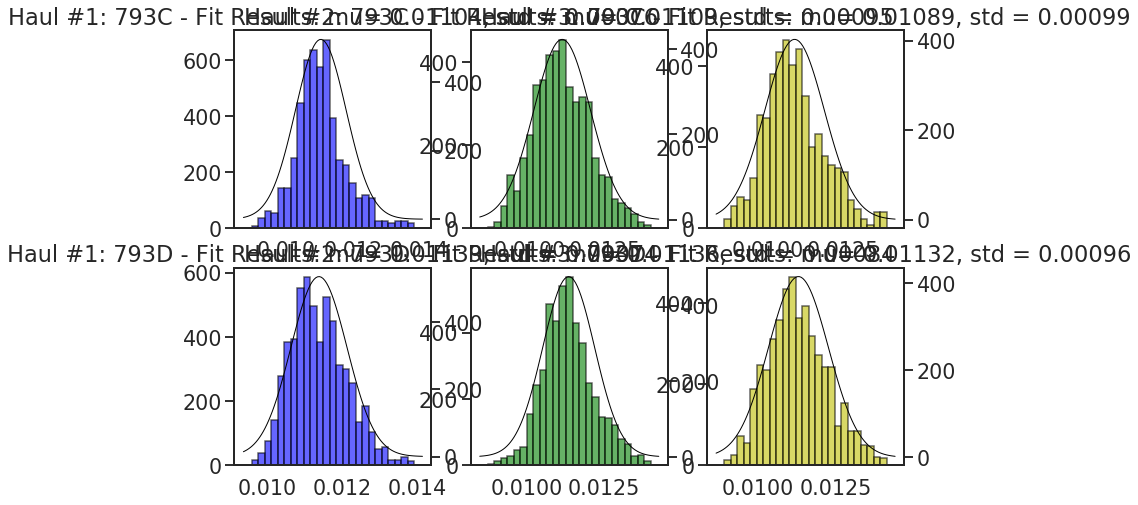

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(12,8))

ax[0,0].hist(FC_Index_1_C_Sorted, bins = 25, density = True, edgecolor = 'black', alpha = 0.6, color = 'b')
ax[0,0] = ax[0,0].twinx()
mu, std = norm.fit(FC_Index_1_C_Sorted)
xmin,xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[0,0].plot (x,p,'k', color= 'k',linewidth = 1)
title = "Haul #1: 793C - Fit Results: mu= %.5f, std = %.5f" % (mu,std)
plt.title(title)

ax[0,1].hist(FC_Index_2_C_Sorted, bins = 25, density = True, edgecolor = 'black', alpha = 0.6, color = 'g')
ax[0,1] = ax[0,1].twinx()
mu, std = norm.fit(FC_Index_2_C_Sorted)
xmin,xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[0,1].plot (x,p,'k', color= 'k',linewidth = 1)
title = "Haul #2: 793C - Fit Results: mu= %.5f, std = %.5f" % (mu,std)
plt.title(title)

ax[0,2].hist(FC_Index_3_C_Sorted, bins = 25, density = True, edgecolor = 'black', alpha = 0.6, color = 'y')
ax[0,2] = ax[0,2].twinx()
mu, std = norm.fit(FC_Index_3_C_Sorted)
xmin,xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[0,2].plot (x,p,'k', color= 'k',linewidth = 1)
title = "Haul #3: 793C - Fit Results: mu= %.5f, std = %.5f" % (mu,std)
plt.title(title)

ax[1,0].hist(FC_Index_1_D_Sorted, bins = 25, density = True, edgecolor = 'black', alpha = 0.6, color = 'b')
ax[1,0] = ax[1,0].twinx()
mu, std = norm.fit(FC_Index_1_D_Sorted)
xmin,xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[1,0].plot (x,p,'k', color= 'k',linewidth = 1)
title = "Haul #1: 793D - Fit Results: mu= %.5f, std = %.5f" % (mu,std)
plt.title(title)

ax[1,1].hist(FC_Index_2_D_Sorted, bins = 25, density = True, edgecolor = 'black', alpha = 0.6, color = 'g')
ax[1,1] = ax[1,1].twinx()
mu, std = norm.fit(FC_Index_2_D_Sorted)
xmin,xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[1,1].plot (x,p,'k', color= 'k',linewidth = 1)
title = "Haul #2: 793D - Fit Results: mu= %.5f, std = %.5f" % (mu,std)
plt.title(title)

ax[1,2].hist(FC_Index_3_D_Sorted, bins = 25, density = True, edgecolor = 'black', alpha = 0.6, color = 'y')
ax[1,2] = ax[1,2].twinx()
mu, std = norm.fit(FC_Index_3_D_Sorted)
xmin,xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax[1,2].plot (x,p,'k', color= 'k',linewidth = 1)
title = "Haul #3: 793D - Fit Results: mu= %.5f, std = %.5f" % (mu,std)
plt.title(title)

fig.tight_layout()

plt.show()

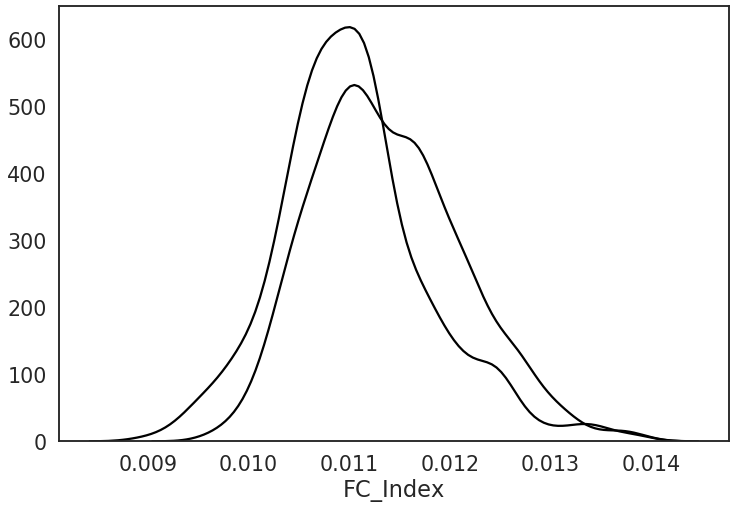

In [ ]:
plt.figure(figsize=(12,8))

sns.distplot(haul_1_C['FC_Index'], hist=False, color = 'k')
# sns.distplot(haul_2_C['FC_Index'], hist=False, color = 'r')
# sns.distplot(haul_3_C['FC_Index'], hist=False, color = 'r')
sns.distplot(haul_1_D['FC_Index'], hist=False, color = 'k')
# sns.distplot(haul_2_D['FC_Index'], hist=False, color = 'b')
# sns.distplot(haul_3_D['FC_Index'], hist=False, color = 'b')

# plt.axvline(haul_2_C.FC_Index.mean(), color = 'r', linestyle = 'dashed', linewidth = 1)
# plt.axvline(haul_4_C.FC_Index.mean(), color = 'b', linestyle = 'dashed', linewidth = 1)
# plt.axvline(haul_5_C.FC_Index.mean(), color = 'c', linestyle = 'dashed', linewidth = 1)

# fig.tight_layout()
plt.show()

In [ ]:
haul_3_C.head()

,Unnamed: 0,TIMESTAMP,EQUIP_IDENT,SHIFT_IDENT,FUEL_USED_IN_CYCLE,HAUL_CYCLE_REC_IDENT,FUEL_CAPACITY,EQMODEL_CODE,START_TIME,END_TIME,SHIFT_DATE,TONNES,TOTAL_TIME,EFH_DIST,LOAD_LOCATION,DUMP_LOCATION,MATERIAL_IDENT,FC_Index,FE_Index,Week_Number,Normalized_FC,L_OpHr
0,164,2019-09-01 07:43:12,6180,2,22.500000,5920365,4462,CAT793C,2019-09-01 08:13:49,2019-09-01 08:41:50,2019-09-01,230,0.418333,10.729,V1070h,24 Mile 1,WRk,0.009118,0.003814,35,-1.787690,53.784861
1,166,2019-09-01 08:12:23,6180,2,27.000000,5920378,4462,CAT793C,2019-09-01 08:41:50,2019-09-01 09:12:31,2019-09-01,230,0.511388,10.728,V1070h,24 Mile 1,WRk,0.010943,0.005596,35,0.053187,52.797450
2,169,2019-09-01 08:18:34,6169,2,24.683857,5920377,4462,CAT793C,2019-09-01 08:42:59,2019-09-01 09:18:43,2019-09-01,230,0.557223,10.725,V1070h,24 Mile 1,WRk,0.010007,0.005576,35,-0.891045,44.297960
3,170,2019-09-01 08:29:22,6177,2,22.750000,5920396,4462,CAT793C,2019-09-01 09:03:07,2019-09-01 09:29:31,2019-09-01,230,0.440002,10.720,V1070h,24 Mile 1,WRk,0.009227,0.004060,35,-1.677667,51.704350
4,174,2019-09-01 09:15:15,6177,2,27.250000,5920416,4462,CAT793C,2019-09-01 09:29:31,2019-09-01 10:15:25,2019-09-01,230,0.566945,10.674,V1070h,24 Mile 1,WRk,0.011100,0.006293,35,0.211780,48.064627


In [ ]:
haul_1_C['Normalized_FC'] = (haul_1_C['FC_Index'] - haul_1_C['FC_Index'].mean())/haul_1_C['FC_Index'].std()
haul_2_C['Normalized_FC'] = (haul_2_C['FC_Index'] - haul_2_C['FC_Index'].mean())/haul_2_C['FC_Index'].std()
haul_3_C['Normalized_FC'] = (haul_3_C['FC_Index'] - haul_3_C['FC_Index'].mean())/haul_3_C['FC_Index'].std()

In [ ]:
haul_1_D['Normalized_FC'] = (haul_1_D['FC_Index'] - haul_1_D['FC_Index'].mean())/haul_1_D['FC_Index'].std()
haul_2_D['Normalized_FC'] = (haul_2_D['FC_Index'] - haul_2_D['FC_Index'].mean())/haul_2_D['FC_Index'].std()
haul_3_D['Normalized_FC'] = (haul_3_D['FC_Index'] - haul_3_D['FC_Index'].mean())/haul_3_D['FC_Index'].std()

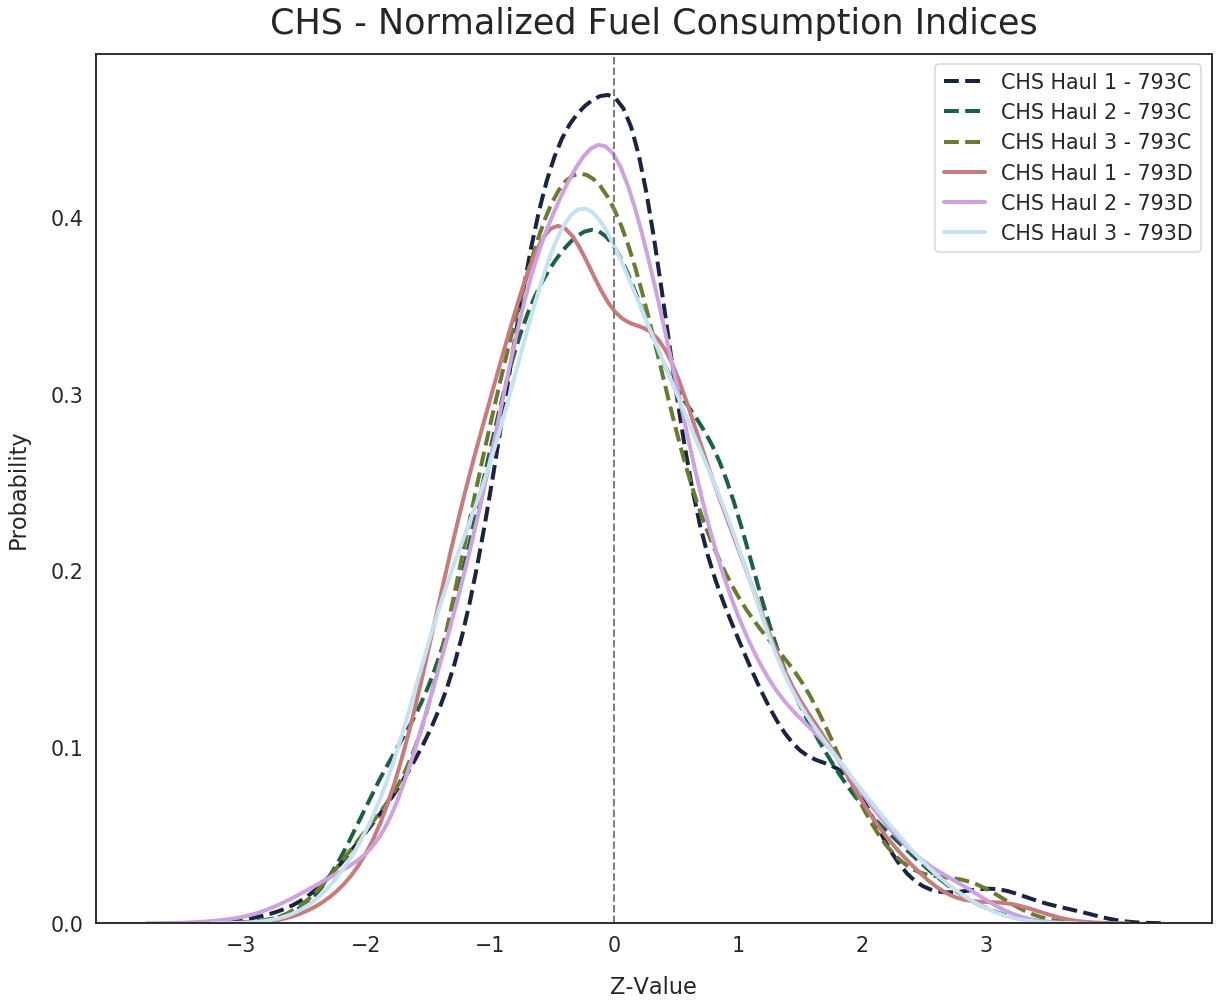

In [ ]:
plt.figure(figsize=(20,16))

sns.set(palette='cubehelix',context='talk',style = 'white',font_scale=1.25)

sns.distplot(haul_1_C['Normalized_FC'], hist=False, label = 'CHS Haul 1 - 793C', kde_kws={'linestyle':'--','linewidth': '4'})
sns.distplot(haul_2_C['Normalized_FC'], hist=False, label = 'CHS Haul 2 - 793C', kde_kws={'linestyle':'--','linewidth': '4'})
sns.distplot(haul_3_C['Normalized_FC'], hist=False, label = 'CHS Haul 3 - 793C', kde_kws={'linestyle':'--','linewidth': '4'})
sns.distplot(haul_1_D['Normalized_FC'], hist=False, label = 'CHS Haul 1 - 793D', kde_kws={'linewidth': '4'})
sns.distplot(haul_2_D['Normalized_FC'], hist=False, label = 'CHS Haul 2 - 793D', kde_kws={'linewidth': '4'})
sns.distplot(haul_3_D['Normalized_FC'], hist=False, label = 'CHS Haul 3 - 793D', kde_kws={'linewidth': '4'})
plt.axvline(0,ls = '--',color = 'grey', linewidth = 2)

plt.xlabel('Z-Value',labelpad=20)
plt.ylabel('Probability', labelpad=20)
plt.xticks(np.arange(-3, 4, 1.0))
plt.yticks(np.arange(0, 0.5, step=0.1))

plt.title('CHS - Normalized Fuel Consumption Indices', fontsize=35,pad=20)

# plt.savefig('CHS-Normalized Fuel Consumption Indices.jpeg')
# from google.colab import files
# files.download('CHS-Normalized Fuel Consumption Indices.jpeg')

plt.show()

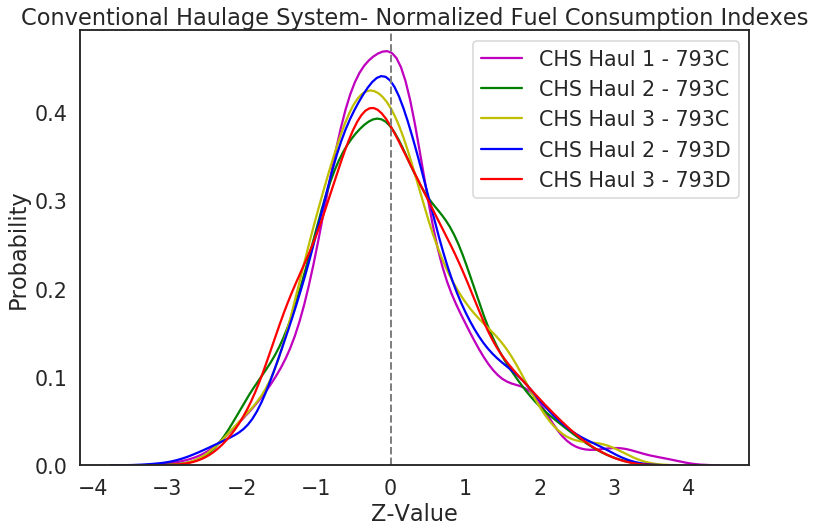

In [ ]:
plt.figure(figsize=(12,8))

sns.distplot(haul_1_C['Normalized_FC'], hist=False, color = 'm', label= 'CHS Haul 1 - 793C')
sns.distplot(haul_2_C['Normalized_FC'], hist=False, color = 'g',label= 'CHS Haul 2 - 793C')
sns.distplot(haul_3_C['Normalized_FC'], hist=False, color = 'y',label= 'CHS Haul 3 - 793C')
# sns.distplot(haul_1_D['Normalized_FC'], hist=False, color = 'eeefff',label= 'CHS Haul 1 - 793D')
sns.distplot(haul_2_D['Normalized_FC'], hist=False, color = 'b',label= 'CHS Haul 2 - 793D')
sns.distplot(haul_3_D['Normalized_FC'], hist=False, color = 'r',label= 'CHS Haul 3 - 793D')

plt.axvline(0,ls = '--',color = 'grey', linewidth = 2)
plt.xlabel('Z-Value')
plt.ylabel('Probability')
plt.title('Conventional Haulage System- Normalized Fuel Consumption Indexes')

# plt.axvline(haul_2.Normalized_FC.mean(), color = 'r', linestyle = 'dashed', linewidth = 1)
# plt.axvline(haul_4.Normalized_FC.mean(), color = 'b', linestyle = 'dashed', linewidth = 1)
# plt.axvline(haul_5.Normalized_FC.mean(), color = 'c', linestyle = 'dashed', linewidth = 1)

# fig.tight_layout()
plt.show()

#Economic Analysis

In [ ]:
# def Net_Cost_Relative_Net_Litres_v1(haul,haul_FC):

#   Total_FC_Index = haul['FC_Index'].sum()
#   Average_Total_Distance = haul['EFH_DIST'].mean()
#   Average_Payload = haul['TONNES'].mean()
#   Average_Total_Time = haul['TOTAL_TIME'].mean()

# # Obtain values greater than mean and less than 80th percentile
#   Overrun_DF = haul[(haul_FC > haul_FC.mean()) & (haul_FC < haul_FC.quantile(0.80))]

# # Calculate the difference between observed overrun and haul average FC
#   Overrun_Delta_Dif = Overrun_DF['FC_Index'] - haul_FC.mean()

# # Sum differences 
#   Overrun_Sum_Delta = Overrun_Delta_Dif.sum() * Average_Total_Distance * Average_Payload

#   Overrun_Total_FC = Overrun_DF['FC_Index'].sum()
#   Overrun_Avg_Distance = Overrun_DF['EFH_DIST'].mean()
#   Overrun_Avg_Payload = Overrun_DF['TONNES'].mean()
#   Overrun_Avg_Time = Overrun_DF['TOTAL_TIME'].mean()

#   Savings_DF = haul[(haul_FC < haul_FC.mean()) & (haul_FC > haul_FC.quantile(0.20))]
#   Savings_Delta_Dif = Savings_DF['FC_Index'] - haul_FC.mean()
#   Savings_Sum_Delta = Savings_Delta_Dif.sum() * Average_Total_Distance * Average_Payload
#   Savings_Total_FC = Savings_DF['FC_Index'].sum()
#   Savings_Avg_Distance = Savings_DF['EFH_DIST'].mean()
#   Savings_Avg_Payload = Savings_DF['TONNES'].mean()
#   Savings_Avg_Time = Savings_DF['TOTAL_TIME'].mean()

#   Overrun_Litres = Overrun_Total_FC * Average_Total_Distance * Average_Payload
#   Savings_Litres = Savings_Total_FC * Average_Total_Distance * Average_Payload
#   Average_Total_Litres = Total_FC_Index * Average_Total_Distance * Average_Payload

#   Delta_Dif = ((Overrun_Sum_Delta + Savings_Sum_Delta)/Average_Total_Litres) * 100

#   Overrun_Cost = Overrun_Litres * 0.92 #Diesel price in Kamloops 
#   Savings_Cost = Savings_Litres * 0.92 #Diesel price in Kamloops 

#   # Overrun_GHG = Overrun_Litres * 1 #GHG Emissions  
#   # Savings_GHG = Savings_Litres * 1 #GHG Emissions 

#   Relative_Net_Litres = (Overrun_Litres - Savings_Litres)/Average_Total_Litres * 100 
#   Net_Cost = Overrun_Cost - Savings_Cost
#   # Net_GHG = Overrun_GHG - Savings_GHG

#   return Relative_Net_Litres, Overrun_Sum_Delta, Savings_Sum_Delta, Delta_Dif

In [ ]:
# Relative_Net_Litres_haul_3_D, Overrun_Sum_Delta_haul_3_D, Savings_Sum_Delta_haul_3_D, Delta_Dif_haul_3_D = Net_Cost_Relative_Net_Litres(haul_3_D,haul_3_D['FC_Index'])

In [ ]:
# print(Delta_Dif_haul_3_D, Relative_Net_Litres_haul_3_D)

In [ ]:
def Net_Cost_Relative_Litres_Savings(haul,haul_FE):

  Total_FE_Index = haul['FE_Index'].sum()
  Average_Total_Distance = haul['TOTAL_EFH'].mean()
  Average_Payload = haul['nominalPayload_Q'].mean()
  Average_Total_Time = haul['TOTAL_TIME'].mean()

  Overrun_DF = haul[(haul_FE > haul_FE.mean()) & (haul_FE < haul_FE.quantile(0.99))]
  Overrun_Total_FE = Overrun_DF['FE_Index'].sum()
  Overrun_Avg_Distance = Overrun_DF['TOTAL_EFH'].mean()
  Overrun_Avg_Payload = Overrun_DF['nominalPayload_Q'].mean()
  Overrun_Avg_Time = Overrun_DF['TOTAL_TIME'].mean()

  Savings_DF = haul[(haul_FE < haul_FE.mean()) & (haul_FE > haul_FE.quantile(0.01))]
  Savings_Total_FE = Savings_DF['FE_Index'].sum()
  Savings_Avg_Distance = Savings_DF['TOTAL_EFH'].mean()
  Savings_Avg_Payload = Savings_DF['nominalPayload_Q'].mean()
  Savings_Avg_Time = Savings_DF['TOTAL_TIME'].mean()

  Overrun_Litres = (Overrun_Total_FE * Overrun_Avg_Distance * Overrun_Avg_Payload) / Overrun_Avg_Time
  Savings_Litres = (Savings_Total_FE * Savings_Avg_Distance * Savings_Avg_Payload) / Savings_Avg_Time
  Average_Total_Litres = (Total_FE_Index * Average_Total_Distance * Average_Payload) / Average_Total_Time

  Overrun_Cost = Overrun_Litres * 0.92
  Savings_Cost = Savings_Litres * 0.92

  Relative_Net_Litres_Savings = (Overrun_Litres - Savings_Litres)/Average_Total_Litres * 100 
  Net_Cost = (Overrun_Litres-Savings_Litres)

  return Net_Cost, Relative_Net_Litres_Savings

In [ ]:
Net_Cost_haul_3_D, Relative_Net_Litres_haul_3_D = Net_Cost_Relative_Net_Litres(haul_3_D, haul_3_D['FE_Index'])

In [ ]:
print(Net_Cost_haul_3_D, Relative_Net_Litres_haul_3_D)

1058.6778504521526 6.702532761833245


###Results: Truck Type C - Monthly

In [ ]:
Net_Cost_haul_1_C, Relative_Net_Litres_haul_1_C = Net_Cost_Relative_Net_Litres(haul_1_C,haul_1_C['FE_Index'])
Net_Cost_haul_2_C, Relative_Net_Litres_haul_2_C = Net_Cost_Relative_Net_Litres(haul_2_C,haul_2_C['FE_Index'])
Net_Cost_haul_3_C, Relative_Net_Litres_haul_3_C  = Net_Cost_Relative_Net_Litres(haul_3_C,haul_3_C['FE_Index'])

In [ ]:
#This represents a total of CAD $1400.55 of overrun cost. 

Total_Net_Cost_CHS_C = Net_Cost_haul_1_C + Net_Cost_haul_2_C + Net_Cost_haul_3_C
print(Total_Net_Cost_CHS_C)

837.4391409544969


In [ ]:
#Below represents a 3.6% relative net litres overrun found in relative net litres for CHS Truck Type C

Average_Relative_Net_Litres_CHS_C = (Relative_Net_Litres_haul_1_C + Relative_Net_Litres_haul_2_C + Relative_Net_Litres_haul_3_C)/3
print(Average_Relative_Net_Litres_CHS_C)

1.1888572220169402


###Results: Truck Type C - Weekly

In [ ]:
#Write for loop to clean this up - Ran this section with quantile analysis

Net_Cost_haul_1_C_wk1, Relative_Net_Litres_haul_1_C_wk1 = Net_Cost_Relative_Net_Litres(haul_1_C_wk1, haul_1_C_wk1['FE_Index'])
Net_Cost_haul_1_C_wk2, Relative_Net_Litres_haul_1_C_wk2 = Net_Cost_Relative_Net_Litres(haul_1_C_wk2, haul_1_C_wk2['FE_Index'])
Net_Cost_haul_1_C_wk3, Relative_Net_Litres_haul_1_C_wk3 = Net_Cost_Relative_Net_Litres(haul_1_C_wk3, haul_1_C_wk3['FE_Index'])
Net_Cost_haul_1_C_wk4, Relative_Net_Litres_haul_1_C_wk4 = Net_Cost_Relative_Net_Litres(haul_1_C_wk4, haul_1_C_wk4['FE_Index'])

Net_Cost_haul_2_C_wk1, Relative_Net_Litres_haul_2_C_wk1 = Net_Cost_Relative_Net_Litres(haul_2_C_wk1, haul_2_C_wk1['FE_Index'])
Net_Cost_haul_2_C_wk2, Relative_Net_Litres_haul_2_C_wk2 = Net_Cost_Relative_Net_Litres(haul_2_C_wk2, haul_2_C_wk2['FE_Index'])
Net_Cost_haul_2_C_wk3, Relative_Net_Litres_haul_2_C_wk3 = Net_Cost_Relative_Net_Litres(haul_2_C_wk3, haul_2_C_wk3['FE_Index'])
Net_Cost_haul_2_C_wk4, Relative_Net_Litres_haul_2_C_wk4 = Net_Cost_Relative_Net_Litres(haul_2_C_wk4, haul_2_C_wk4['FE_Index'])

Net_Cost_haul_3_C_wk1, Relative_Net_Litres_haul_3_C_wk1 = Net_Cost_Relative_Net_Litres(haul_3_C_wk1, haul_3_C_wk1['FE_Index'])
Net_Cost_haul_3_C_wk2, Relative_Net_Litres_haul_3_C_wk2 = Net_Cost_Relative_Net_Litres(haul_3_C_wk2, haul_3_C_wk2['FE_Index'])
Net_Cost_haul_3_C_wk3, Relative_Net_Litres_haul_3_C_wk3 = Net_Cost_Relative_Net_Litres(haul_3_C_wk3, haul_3_C_wk3['FE_Index'])
Net_Cost_haul_3_C_wk4, Relative_Net_Litres_haul_3_C_wk4 = Net_Cost_Relative_Net_Litres(haul_3_C_wk4, haul_3_C_wk4['FE_Index'])

In [ ]:
Average_Relative_Net_Litres_C_wk1 =  (Relative_Net_Litres_haul_1_C_wk1 + Relative_Net_Litres_haul_2_C_wk1 + Relative_Net_Litres_haul_3_C_wk1)/3
Average_Relative_Net_Litres_C_wk2 =  (Relative_Net_Litres_haul_1_C_wk2 + Relative_Net_Litres_haul_2_C_wk2 + Relative_Net_Litres_haul_3_C_wk2)/3
Average_Relative_Net_Litres_C_wk3 =  (Relative_Net_Litres_haul_1_C_wk3 + Relative_Net_Litres_haul_2_C_wk3 + Relative_Net_Litres_haul_3_C_wk3)/3
Average_Relative_Net_Litres_C_wk4 =  (Relative_Net_Litres_haul_1_C_wk4 + Relative_Net_Litres_haul_2_C_wk4 + Relative_Net_Litres_haul_3_C_wk4)/3

print(Average_Relative_Net_Litres_C_wk1, Average_Relative_Net_Litres_C_wk2, Average_Relative_Net_Litres_C_wk3,Average_Relative_Net_Litres_C_wk4)

3.2032724640955688 -5.961969025647858 2.697085659284234 -0.13007465220571213


In [ ]:
#This represents a 9.16% relative net litres overrun from using the weekly data within Truck Type C. We can see that there is a 3& increase in relative litre consumption compared to monthly analysis.

Average_Relative_Net_Litres_C_Total_Weeks = (Average_Relative_Net_Litres_C_wk1 + Average_Relative_Net_Litres_C_wk2 + Average_Relative_Net_Litres_C_wk3 + Average_Relative_Net_Litres_C_wk4)/4
print(Average_Relative_Net_Litres_C_Total_Weeks)

-0.04792138861844186


In [ ]:
Total_Net_Cost_C_wk1 =  (Net_Cost_haul_1_C_wk1 + Net_Cost_haul_2_C_wk1 + Net_Cost_haul_3_C_wk1)
Total_Net_Cost_C_wk2 =  (Net_Cost_haul_1_C_wk2 + Net_Cost_haul_2_C_wk2 + Net_Cost_haul_3_C_wk2)
Total_Net_Cost_C_wk3 =  (Net_Cost_haul_1_C_wk3 + Net_Cost_haul_2_C_wk3 + Net_Cost_haul_3_C_wk3)
Total_Net_Cost_C_wk4 =  (Net_Cost_haul_1_C_wk4 + Net_Cost_haul_2_C_wk4 + Net_Cost_haul_3_C_wk4)

print(Total_Net_Cost_C_wk1,Total_Net_Cost_C_wk2, Total_Net_Cost_C_wk3,Total_Net_Cost_C_wk4)

57.06364906632757 222.63688544566065 140.0610426073829 30.31934128556668


In [ ]:
#This represents CAD $3536.92 for three hauls in a month of cost overrun. 

Total_Net_Cost_C_Total_Weeks = (Total_Net_Cost_C_wk1 + Total_Net_Cost_C_wk2 + Total_Net_Cost_C_wk3 + Total_Net_Cost_C_wk4)
print(Total_Net_Cost_C_Total_Weeks)

450.0809184049378


###Results: Truck Type D - Monthly

In [ ]:
Net_Cost_haul_1_D, Relative_Net_Litres_haul_1_D = Net_Cost_Relative_Net_Litres(haul_1_D,haul_1_D['FE_Index'])
Net_Cost_haul_2_D, Relative_Net_Litres_haul_2_D = Net_Cost_Relative_Net_Litres(haul_2_D,haul_2_D['FE_Index'])
Net_Cost_haul_3_D, Relative_Net_Litres_haul_3_D = Net_Cost_Relative_Net_Litres(haul_3_D,haul_3_D['FE_Index'])

In [ ]:
#This represents CAD $2653.14 for a single haul in a month of cost savings. 

Total_Net_Cost_CHS_D = Net_Cost_haul_1_D + Net_Cost_haul_2_D + Net_Cost_haul_3_D
print(Total_Net_Cost_CHS_D)

3384.874628754823


In [ ]:
#Below represents a 2.2% relative net litres savings for CHS Truck Type D

Average_Relative_Net_Litres_CHS_D = (Relative_Net_Litres_haul_1_D + Relative_Net_Litres_haul_2_D + Relative_Net_Litres_haul_3_D)/3
print(Average_Relative_Net_Litres_CHS_D)

5.008428065561481


###Results: Truck Type D - Weekly

In [ ]:
Net_Cost_haul_1_D_wk1, Relative_Net_Litres_haul_1_D_wk1 = Net_Cost_Relative_Net_Litres(haul_1_D_wk1, haul_1_D_wk1['FE_Index'])
Net_Cost_haul_1_D_wk2, Relative_Net_Litres_haul_1_D_wk2 = Net_Cost_Relative_Net_Litres(haul_1_D_wk2, haul_1_D_wk2['FE_Index'])
Net_Cost_haul_1_D_wk3, Relative_Net_Litres_haul_1_D_wk3 = Net_Cost_Relative_Net_Litres(haul_1_D_wk3, haul_1_D_wk3['FE_Index'])
Net_Cost_haul_1_D_wk4, Relative_Net_Litres_haul_1_D_wk4 = Net_Cost_Relative_Net_Litres(haul_1_D_wk4, haul_1_D_wk4['FE_Index'])

Net_Cost_haul_2_D_wk1, Relative_Net_Litres_haul_2_D_wk1 = Net_Cost_Relative_Net_Litres(haul_2_D_wk1, haul_2_D_wk1['FE_Index'])
Net_Cost_haul_2_D_wk2, Relative_Net_Litres_haul_2_D_wk2 = Net_Cost_Relative_Net_Litres(haul_2_D_wk2, haul_2_D_wk2['FE_Index'])
Net_Cost_haul_2_D_wk3, Relative_Net_Litres_haul_2_D_wk3 = Net_Cost_Relative_Net_Litres(haul_2_D_wk3, haul_2_D_wk3['FE_Index'])
Net_Cost_haul_2_D_wk4, Relative_Net_Litres_haul_2_D_wk4 = Net_Cost_Relative_Net_Litres(haul_2_D_wk4, haul_2_D_wk4['FE_Index'])

Net_Cost_haul_3_D_wk1, Relative_Net_Litres_haul_3_D_wk1 = Net_Cost_Relative_Net_Litres(haul_3_D_wk1, haul_3_D_wk1['FE_Index'])
Net_Cost_haul_3_D_wk2, Relative_Net_Litres_haul_3_D_wk2 = Net_Cost_Relative_Net_Litres(haul_3_D_wk2, haul_3_D_wk2['FE_Index'])
Net_Cost_haul_3_D_wk3, Relative_Net_Litres_haul_3_D_wk3 = Net_Cost_Relative_Net_Litres(haul_3_D_wk3, haul_3_D_wk3['FE_Index'])
Net_Cost_haul_3_D_wk4, Relative_Net_Litres_haul_3_D_wk4 = Net_Cost_Relative_Net_Litres(haul_3_D_wk4, haul_3_D_wk4['FE_Index'])

In [ ]:
Average_Relative_Net_Litres_D_wk1 =  (Relative_Net_Litres_haul_1_D_wk1 + Relative_Net_Litres_haul_2_D_wk1 + Relative_Net_Litres_haul_3_D_wk1)/3
Average_Relative_Net_Litres_D_wk2 =  (Relative_Net_Litres_haul_1_D_wk2 + Relative_Net_Litres_haul_2_D_wk2 + Relative_Net_Litres_haul_3_D_wk2)/3
Average_Relative_Net_Litres_D_wk3 =  (Relative_Net_Litres_haul_1_D_wk3 + Relative_Net_Litres_haul_2_D_wk3 + Relative_Net_Litres_haul_3_D_wk3)/3
Average_Relative_Net_Litres_D_wk4 =  (Relative_Net_Litres_haul_1_D_wk4 + Relative_Net_Litres_haul_2_D_wk4 + Relative_Net_Litres_haul_3_D_wk4)/3

print(Average_Relative_Net_Litres_D_wk1,Average_Relative_Net_Litres_D_wk2, Average_Relative_Net_Litres_D_wk3,Average_Relative_Net_Litres_D_wk4)

9.31089202901759 7.904472495795386 1.9345987467323909 4.668185418864786


In [ ]:
#This represents a 1.1% cost savings from using the weekly data within Truck Type D. 

Average_Relative_Net_Litres_D_Total_Weeks = (Average_Relative_Net_Litres_D_wk1 + Average_Relative_Net_Litres_D_wk2 + Average_Relative_Net_Litres_D_wk3 + Average_Relative_Net_Litres_D_wk4)/4
print(Average_Relative_Net_Litres_D_Total_Weeks)

5.954537172602539


In [ ]:
Total_Net_Cost_D_wk1 =  (Net_Cost_haul_1_D_wk1 + Net_Cost_haul_2_D_wk1 + Net_Cost_haul_3_D_wk1)
Total_Net_Cost_D_wk2 =  (Net_Cost_haul_1_D_wk2 + Net_Cost_haul_2_D_wk2 + Net_Cost_haul_3_D_wk2)
Total_Net_Cost_D_wk3 =  (Net_Cost_haul_1_D_wk3 + Net_Cost_haul_2_D_wk3 + Net_Cost_haul_3_D_wk3)
Total_Net_Cost_D_wk4 =  (Net_Cost_haul_1_D_wk4 + Net_Cost_haul_2_D_wk4 + Net_Cost_haul_3_D_wk4)

print(Total_Net_Cost_D_wk1,Total_Net_Cost_D_wk2, Total_Net_Cost_D_wk3,Total_Net_Cost_D_wk4)

478.438391863344 449.32295665678635 61.38683780260976 1145.9981187974163


In [ ]:
#This represents CAD $1062.33 for three hauls in a month of cost savings. 

Total_Net_Cost_D_Total_Weeks = (Total_Net_Cost_D_wk1 + Total_Net_Cost_D_wk2 + Total_Net_Cost_D_wk3 + Total_Net_Cost_D_wk4)
print(Total_Net_Cost_D_Total_Weeks)

2135.1463051201563


###Results: Truck Type C & D - Monthly

In [ ]:
#This represents a 0.69% cost overrun for three specific hauls over a 4 week time period. 

Average_Relative_Net_Litres_Total_CHS = (Average_Relative_Net_Litres_CHS_C + Average_Relative_Net_Litres_CHS_D)/2
print(Average_Relative_Net_Litres_Total_CHS, Average_Relative_Net_Litres_CHS_C, Average_Relative_Net_Litres_CHS_D)

3.0986426437892107 1.1888572220169402 5.008428065561481


In [ ]:
#This represents a CAD $1252.59 cost savings for three specific hauls over a 4 week time period, using each week as a point estimator. 

Total_Net_Cost_CHS = Total_Net_Cost_CHS_C + Total_Net_Cost_CHS_D

print(Total_Net_Cost_CHS)

4222.31376970932


###Results: Truck Type C & D - Weekly

In [ ]:
#This represents a  for three specific hauls over a 4 week time period, using each week as a point estimator. 

Average_Relative_Net_Litres_Total_CHS_Weeks = (Average_Relative_Net_Litres_C_Total_Weeks + Average_Relative_Net_Litres_D_Total_Weeks)/2
print(Average_Relative_Net_Litres_Total_CHS_Weeks)

2.9533078919920484


In [ ]:
#This represents a CAD $2494.59 cost overrun for three specific hauls over a 4 week time period, using each week as a point estimator. 

Total_Net_Cost_CHS_Weeks = Total_Net_Cost_C_Total_Weeks + Total_Net_Cost_D_Total_Weeks
print(Total_Net_Cost_CHS_Weeks)

2585.227223525094


#TALPAC Analysis

In [ ]:
def Average_Trucks_Per_Haul(haul):
  
  Average_Trucks = haul.groupby(['SHIFT_DATE','SHIFT_IDENT']).agg(COUNT=('EQUIP_IDENT','nunique')).mean()
  
  return Average_Trucks

In [ ]:
def Litres_Per_Op_Hour(haul): 
  
  haul['L_OpHr'] = haul['FUEL_USED_IN_CYCLE']/haul['TOTAL_TIME']

In [ ]:
Litres_Per_Op_Hour(haul_1_C)
Litres_Per_Op_Hour(haul_2_C)
Litres_Per_Op_Hour(haul_3_C)

In [ ]:
Litres_Per_Op_Hour(haul_1_D)
Litres_Per_Op_Hour(haul_2_D)
Litres_Per_Op_Hour(haul_3_D)

In [ ]:
Average_Trucks_Haul_1_C = Average_Trucks_Per_Haul(haul_1_C)
Average_Trucks_Haul_1_D = Average_Trucks_Per_Haul(haul_1_D)

Average_Trucks_Haul_2_C = Average_Trucks_Per_Haul(haul_2_C)
Average_Trucks_Haul_2_D = Average_Trucks_Per_Haul(haul_2_D)

Average_Trucks_Haul_3_C = Average_Trucks_Per_Haul(haul_3_C)
Average_Trucks_Haul_3_D = Average_Trucks_Per_Haul(haul_3_D)

print(Average_Trucks_Haul_1_C, 
      Average_Trucks_Haul_1_D, 
      Average_Trucks_Haul_2_C, 
      Average_Trucks_Haul_2_D, 
      Average_Trucks_Haul_3_C, 
      Average_Trucks_Haul_3_D)

COUNT    2.6875
dtype: float64 COUNT    5.9375
dtype: float64 COUNT    6.583333
dtype: float64 COUNT    8.315789
dtype: float64 COUNT    5.833333
dtype: float64 COUNT    9.24
dtype: float64


In [ ]:
haul_1_C.describe()

,Unnamed: 0,EQUIP_IDENT,SHIFT_IDENT,FUEL_USED_IN_CYCLE,HAUL_CYCLE_REC_IDENT,FUEL_CAPACITY,TONNES,TOTAL_TIME,EFH_DIST,FC_Index,FE_Index,Week_Number,Normalized_FC,L_OpHr
count,572.000000,572.000000,572.000000,572.000000,5.720000e+02,572.000000,572.0,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02,572.000000
mean,4581.624126,6173.798951,1.480769,29.823947,6.004828e+06,4289.192308,230.0,0.536791,11.743650,0.011043,0.005948,47.251748,1.739862e-14,55.834690
std,714.505132,3.374438,0.500067,2.040084,6.333229e+03,271.688245,0.0,0.049316,0.154422,0.000760,0.000849,0.875577,1.000000e+00,4.355628
min,3403.000000,6160.000000,1.000000,24.500000,5.983273e+06,3865.000000,230.0,0.413612,11.478000,0.008967,0.003709,44.000000,-2.729441e+00,44.249303
25%,3902.500000,6172.000000,1.000000,28.500000,5.999781e+06,3865.000000,230.0,0.500556,11.579000,0.010569,0.005352,47.000000,-6.235879e-01,53.050302
50%,4591.500000,6175.000000,1.000000,29.750000,6.007080e+06,4462.000000,230.0,0.530416,11.800000,0.010991,0.005809,48.000000,-6.858139e-02,56.133458
75%,5156.500000,6176.000000,2.000000,31.000000,6.009547e+06,4462.000000,230.0,0.567848,11.829000,0.011395,0.006469,48.000000,4.634583e-01,58.891588
max,5846.000000,6180.000000,2.000000,36.750000,6.012621e+06,4718.000000,230.0,0.681390,12.215000,0.013846,0.009002,48.000000,3.686314e+00,69.481135


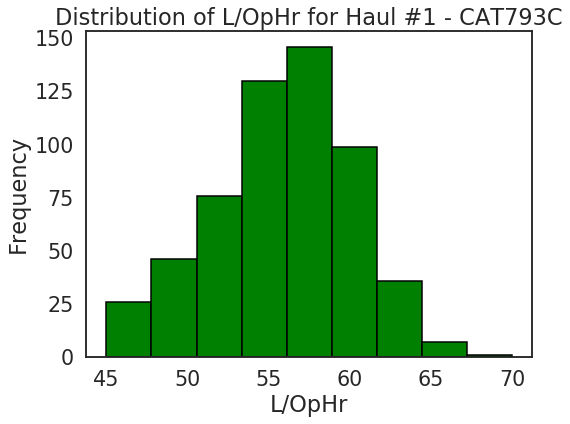

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(haul_1_C.L_OpHr,color='green', bins = np.linspace(45,70,10), edgecolor = 'black')
plt.xlabel('L/OpHr')
plt.ylabel('Frequency')
plt.title('Distribution of L/OpHr for Haul #1 - CAT793C')
# plt.axvline(154.3, color='w', linestyle='dashed', linewidth=1)
plt.show()

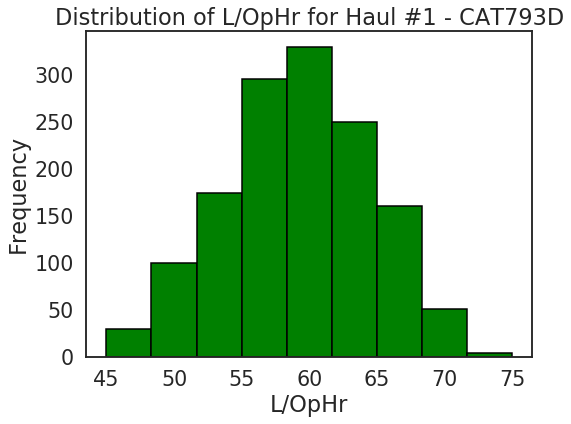

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(haul_1_D.L_OpHr,color='green', bins = np.linspace(45,75,10), edgecolor = 'black')
plt.xlabel('L/OpHr')
plt.ylabel('Frequency')
plt.title('Distribution of L/OpHr for Haul #1 - CAT793D')
# plt.axvline(154.3, color='w', linestyle='dashed', linewidth=1)
plt.show()

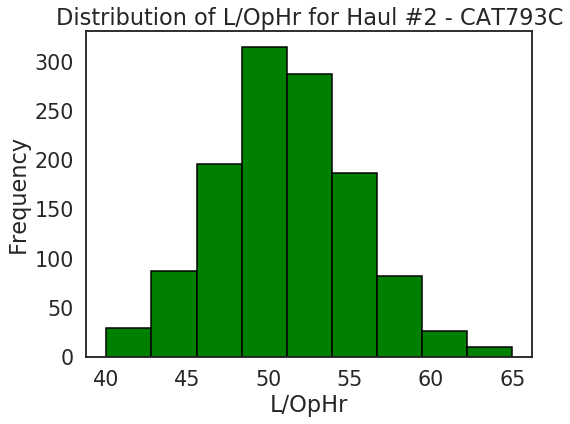

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(haul_2_C.L_OpHr,color='green', bins = np.linspace(40,65,10), edgecolor = 'black')
plt.xlabel('L/OpHr')
plt.ylabel('Frequency')
plt.title('Distribution of L/OpHr for Haul #2 - CAT793C')
# plt.axvline(154.3, color='w', linestyle='dashed', linewidth=1)
plt.show()

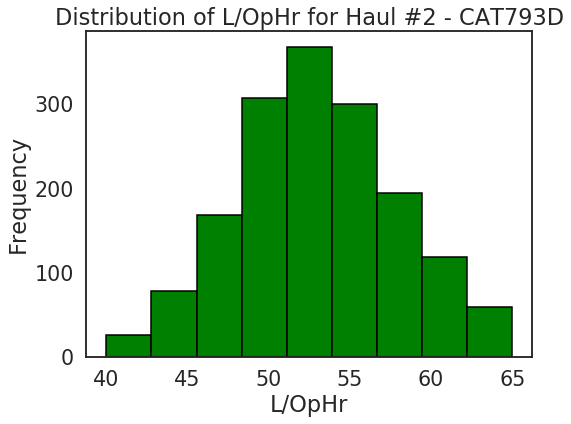

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(haul_2_D.L_OpHr,color='green', bins = np.linspace(40,65,10), edgecolor = 'black')
plt.xlabel('L/OpHr')
plt.ylabel('Frequency')
plt.title('Distribution of L/OpHr for Haul #2 - CAT793D')
# plt.axvline(154.3, color='w', linestyle='dashed', linewidth=1)
plt.show()

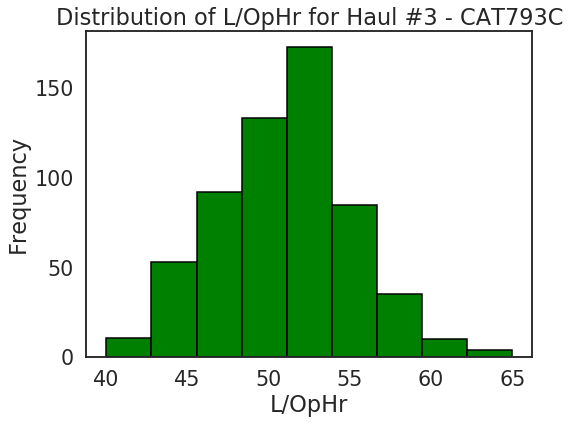

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(haul_3_C.L_OpHr,color='green', bins = np.linspace(40,65,10), edgecolor = 'black')
plt.xlabel('L/OpHr')
plt.ylabel('Frequency')
plt.title('Distribution of L/OpHr for Haul #3 - CAT793C')
# plt.axvline(154.3, color='w', linestyle='dashed', linewidth=1)
plt.show()

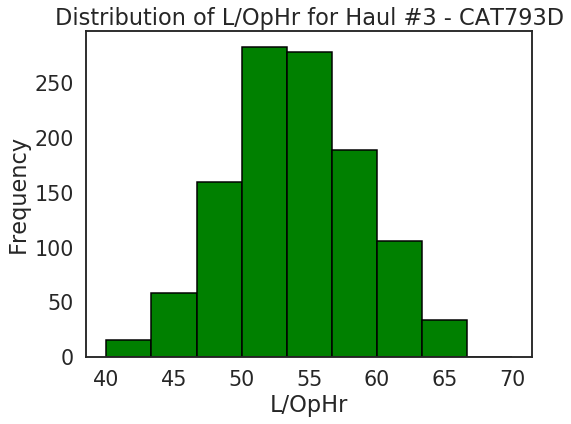

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(haul_3_D.L_OpHr,color='green', bins = np.linspace(40,70,10), edgecolor = 'black')
plt.xlabel('L/OpHr')
plt.ylabel('Frequency')
plt.title('Distribution of L/OpHr for Haul #3 - CAT793D')
# plt.axvline(154.3, color='w', linestyle='dashed', linewidth=1)
plt.show()

In [ ]:
print(
np.count_nonzero(haul_1_C.EQUIP_IDENT.unique()),
np.count_nonzero(haul_2_C.EQUIP_IDENT.unique()),
np.count_nonzero(haul_3_C.EQUIP_IDENT.unique()),
np.count_nonzero(haul_1_D.EQUIP_IDENT.unique()),
np.count_nonzero(haul_2_D.EQUIP_IDENT.unique()),
np.count_nonzero(haul_3_D.EQUIP_IDENT.unique()))

14 16 15 25 26 22


In [ ]:
haul_2_C.head()

,Unnamed: 0,TIMESTAMP,EQUIP_IDENT,SHIFT_IDENT,FUEL_USED_IN_CYCLE,HAUL_CYCLE_REC_IDENT,FUEL_CAPACITY,EQMODEL_CODE,START_TIME,END_TIME,SHIFT_DATE,TONNES,TOTAL_TIME,EFH_DIST,LOAD_LOCATION,DUMP_LOCATION,MATERIAL_IDENT,FC_Index,FE_Index,Week_Number,Normalized_FC,L_OpHr
0,450,2019-08-30 20:10:45,6175,1,31.25,5918827,3865,CAT793C,2019-08-30 20:24:27,2019-08-30 21:07:10,2019-08-31,230,0.711943,12.137,V1100d,24 Mile 1,WRk,0.011195,0.007970,35,0.110250,43.893943
1,451,2019-08-30 20:12:25,6165,1,39.25,5918257,3865,CAT793C,2019-08-30 07:25:05,2019-08-30 21:12:28,2019-08-31,230,0.713333,12.156,V1100d,24 Mile 1,WRk,0.014039,0.010014,35,3.118200,55.023364
2,452,2019-08-30 20:32:54,6172,1,29.00,5918846,4462,CAT793C,2019-08-30 20:52:48,2019-08-30 21:32:16,2019-08-31,230,0.657780,12.171,V1100d,24 Mile 1,WRk,0.010360,0.006814,35,-0.772969,44.087689
3,454,2019-08-30 20:45:03,6175,1,29.75,5918861,3865,CAT793C,2019-08-30 21:07:10,2019-08-30 21:42:57,2019-08-31,230,0.594165,12.158,V1100d,24 Mile 1,WRk,0.010639,0.006321,35,-0.477569,50.070267
4,455,2019-08-30 20:49:54,6165,1,30.25,5918864,3865,CAT793C,2019-08-30 21:12:28,2019-08-30 21:50:06,2019-08-31,230,0.611112,12.151,V1100d,24 Mile 1,WRk,0.010824,0.006615,35,-0.281855,49.499955
